In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

In [3]:
df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


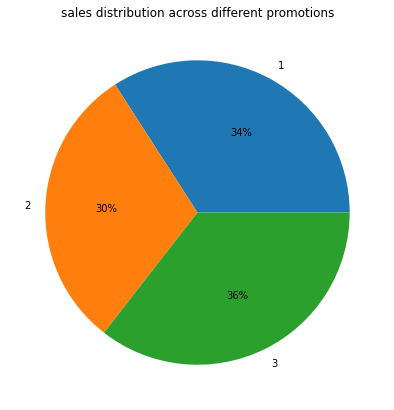

In [6]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7,7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

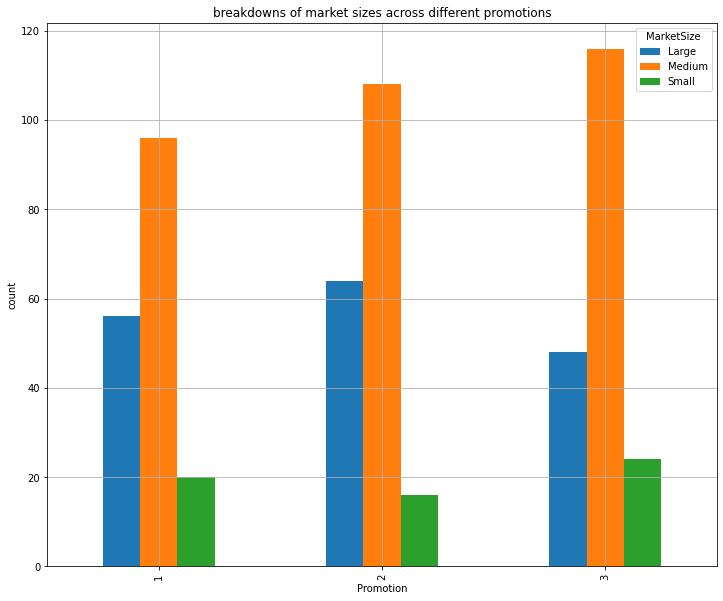

In [7]:
ax = df.groupby([
   'Promotion', 'MarketSize'              
]).count()[
  'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

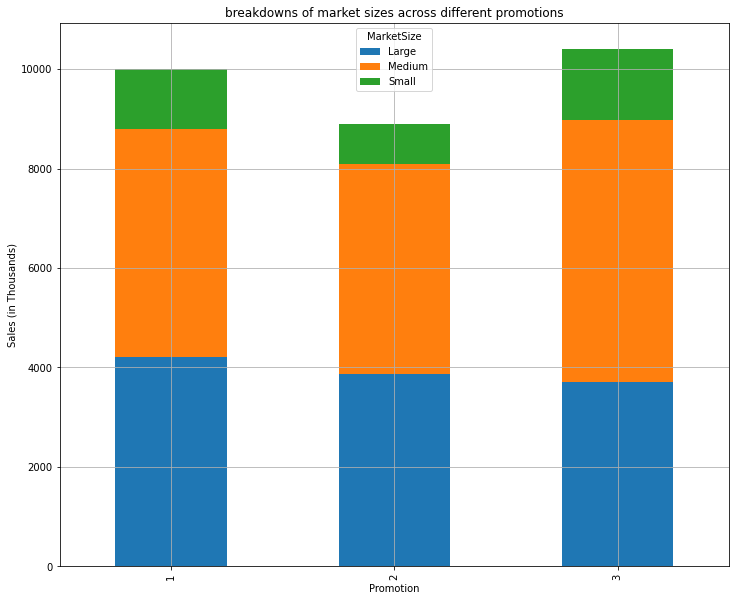

In [8]:
ax = df.groupby([
   'Promotion', 'MarketSize'              
]).sum()[
  'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

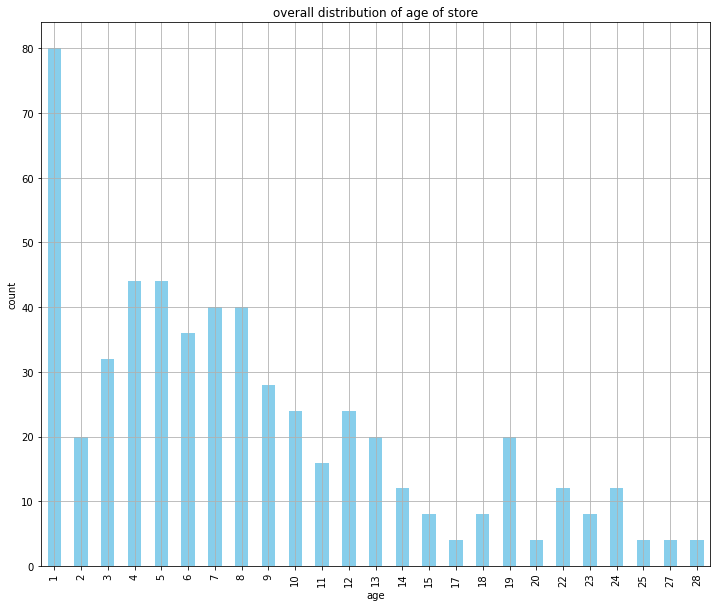

In [9]:
ax = df.groupby(
   'AgeOfStore'              
).count()[
  'MarketID'
].plot(
    kind='bar',
    color='skyblue',
    figsize=(12,10),
    grid=True,
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distribution of age of store')

plt.show()

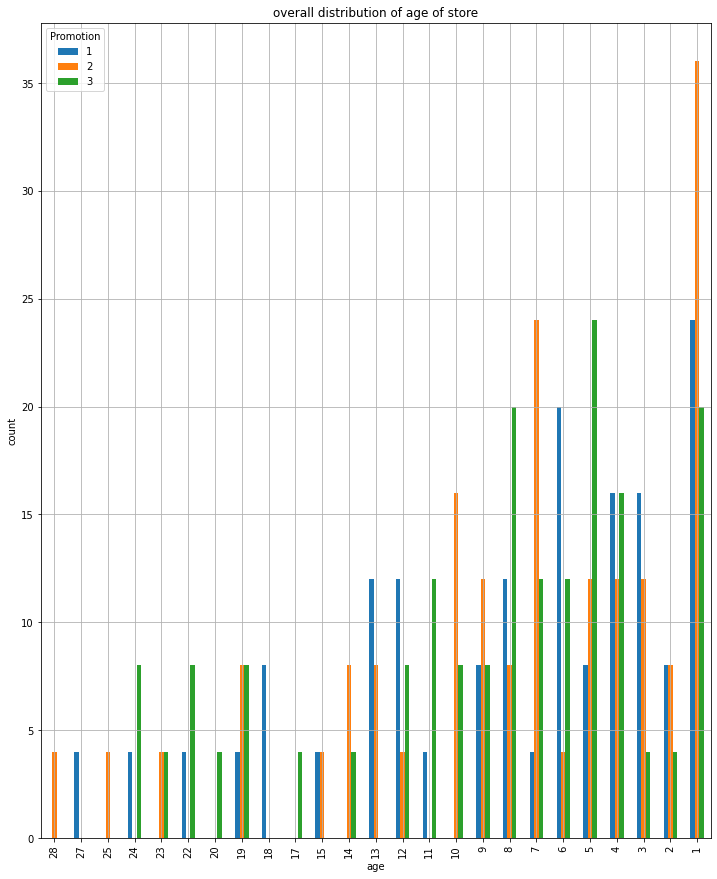

In [10]:
ax = df.groupby(
   ['AgeOfStore', 'Promotion']              
).count()[
  'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='bar',
    figsize=(12,15),
    grid=True,
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distribution of age of store')

plt.show()

In [11]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


In [12]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

In [13]:
t_1_vs_2 = (
    means.iloc[0] - means.iloc[1]
) / np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
)

In [14]:
from scipy import stats 

In [15]:
df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1)) * 2 

In [16]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var=False
)

In [17]:
t

6.42752867090748

In [18]:
p

4.2903687179871785e-10

In [19]:
t_1_vs_3 = (
    means.iloc[0] - means.iloc[2]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2])
)

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [20]:
t_1_vs_3

1.5560224307759116

In [21]:
p_1_vs_3

0.12058631176433687